In [1]:
#Imports et versions 
import pandas as pd
print("Pandas version :",pd.__version__)
import numpy as np
print("Numpy version :",np.__version__)
import matplotlib
print("Matplotlib version :",matplotlib.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print("Seaborn version :",sns.__version__)
import scipy
print("Scipy version :",scipy.__version__)
import sklearn
print("Sklearn version :",sklearn.__version__)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
import IPython
from IPython.display import display
print("IPython version :",IPython.__version__)

Pandas version : 1.2.4
Numpy version : 1.21.4
Matplotlib version : 3.4.3
Seaborn version : 0.11.1
Scipy version : 1.6.2
Sklearn version : 0.24.1
IPython version : 7.22.0


# QUESTION 1

In [2]:
#Question 1)
df = pd.read_csv("https://raw.githubusercontent.com/anassag/TP-reduction-dimension/main/data_contamine.csv", header=None)

print("Corrupted diabetes :")
print()
print("Head du dataset :")
print()
display(df.head())
print()
print("Dataset shape :")
print(df.shape)
print()
print("Cohérent avec l'énoncé : 160 variables explicatives, 1 variable à expliquer -> 161 colonnes ; 442 observations.")

#On définit X et y
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

Corrupted diabetes :

Head du dataset :



,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.223773,2.407005,-0.536073,-1.336626,-0.097947,1.549540,1.590890,1.190101,-1.181936,2.731036,...,-1.157572,-0.316955,-1.041194,-0.929746,-1.779339,-1.429081,2.685259,0.953334,-0.564672,151.0
1,-0.515789,-0.799958,1.582195,-0.008126,0.414271,1.363709,-0.098582,-0.302917,-0.544602,-0.241896,...,0.241794,-0.937335,0.288955,-0.177624,0.084456,0.633965,1.052004,-0.113860,0.505908,75.0
2,0.023454,0.048646,0.224159,0.655717,-0.176065,1.605403,1.638630,-1.240650,2.100396,-1.031570,...,0.483655,0.869513,0.881769,-0.958674,1.880679,0.608850,-0.057137,-0.950829,-0.594289,141.0
3,0.892292,-0.494714,-1.062153,0.736429,-0.118200,-1.078412,-0.454316,-0.378080,2.679422,-0.051751,...,0.385350,-0.021720,0.863478,0.256292,0.293780,0.216499,-0.637889,-1.179666,-1.112571,206.0
4,-1.021634,-1.805761,0.082164,0.387965,-0.838219,1.596253,0.037945,-1.012175,1.632963,-0.533814,...,0.661239,0.329027,-0.757433,0.082726,0.267892,0.282614,-2.022049,-2.201643,0.786962,135.0



Dataset shape :
(442, 161)

Cohérent avec l'énoncé : 160 variables explicatives, 1 variable à expliquer -> 161 colonnes ; 442 observations.


# QUESTION 2

Centrage et normalisation :

Nombre de variables explicatives dont la moyenne est proche de 0 : 160
Les données sont centrées.
Nombre de variables explicatives dont l'écart-type est proche de 1 : 160
Les données sont normalisées.

Moyenne de la variable à expliquer :
152.13348416289594
Écart-type de la variable à expliquer :
77.00574586945044
La variable à expliquer n'est ni normalisée, ni centrée.

Scatter plot de chaque variable en fonction de chaque autre, 4 variables explicatives tirées au hasard + la variable à expliquer :



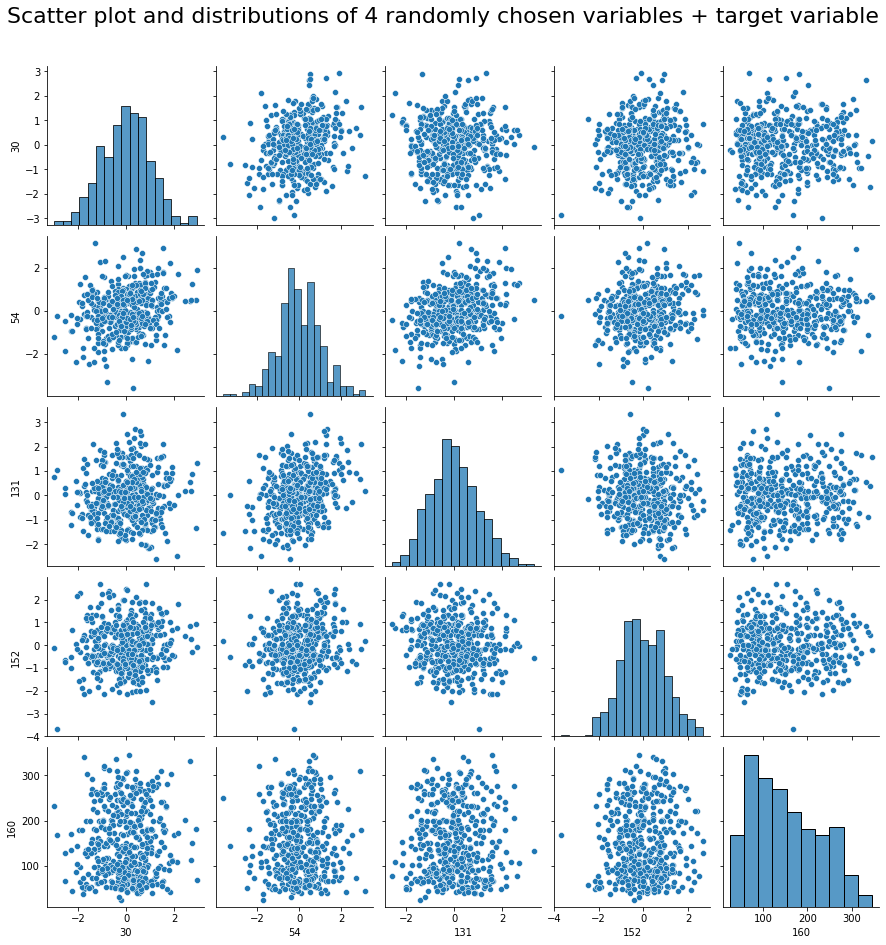

In [3]:
#Question 2)
print("Centrage et normalisation :")
print()
print("Nombre de variables explicatives dont la moyenne est proche de 0 :",sum(np.isclose(X.describe().loc["mean",:].values,0)))
print("Les données sont centrées.")
print("Nombre de variables explicatives dont l'écart-type est proche de 1 :",sum(np.isclose(X.describe().loc["std",:].values,1,10**-2)))
print("Les données sont normalisées.")
print()
print("Moyenne de la variable à expliquer :")
print(np.mean(y.values))
print("Écart-type de la variable à expliquer :")
print(np.std(y.values))
print("La variable à expliquer n'est ni normalisée, ni centrée.")
print()
print("Scatter plot de chaque variable en fonction de chaque autre, 4 variables explicatives tirées au hasard + la variable à expliquer :")
print()
X_plot = X.sample(4, random_state=13, axis=1).merge(y, right_index=True, left_index=True)
g = sns.pairplot(X_plot)
g.fig.suptitle("Scatter plot and distributions of 4 randomly chosen variables + target variable", fontsize=22, y = 1.05)
plt.show()

Vus les nuages, les variables explicatives ne sont ni corrélées entre elles, ni corrélées avec la variable à expliquer.  
C'est cohérent avec l'énoncé : ce sont des variables purement aléatoires ajoutées malicieusement.

# QUESTION 3

In [4]:
#Question 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)
print("Échantillons de train et test :")
print("Taille du train :",X_train.shape)
print("Taille du test :",X_test.shape)
print()
print("Démonstration de la non-normalisation :")
print("Nombre de moyennes nulles et d'écarts-types à 1 du train :")
print("Moyennes nulles :",sum(np.isclose(np.mean(X_train),0)))
print("Std à 1 :",sum(np.isclose(np.std(X_train),1,10**-2)))
print("Nombre de moyennes nulles et d'écarts-types à 1 du test :")
print("Moyennes nulles :",sum(np.isclose(np.mean(X_test),0)))
print("Std à 1 :",sum(np.isclose(np.std(X_test),1,10**-2)))
print("Les données ne sont plus normalisées.")

Échantillons de train et test :
Taille du train : (331, 160)
Taille du test : (111, 160)

Démonstration de la non-normalisation :
Nombre de moyennes nulles et d'écarts-types à 1 du train :
Moyennes nulles : 0
Std à 1 : 75
Nombre de moyennes nulles et d'écarts-types à 1 du test :
Moyennes nulles : 0
Std à 1 : 30
Les données ne sont plus normalisées.


# QUESTION 4

Matrice de covariance de X_train :



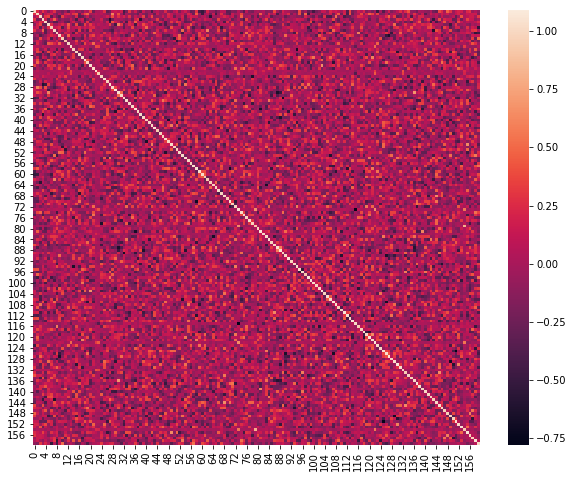


Dimensions de la matrice de covariance de X_train : (160, 160)
Nombre de valeurs propres : 160
Plot de la décroissance des valeurs propres :



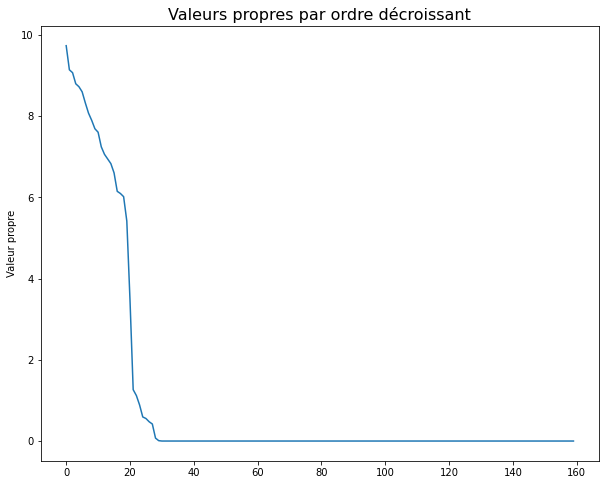

In [5]:
#Question 4)
print("Matrice de covariance de X_train :")
print()
plt.figure(figsize=(10,8))
sns.heatmap(X_train.cov())
plt.show()
print()
print("Dimensions de la matrice de covariance de X_train :", X_train.cov().shape)
eigvals, eigvecs = np.linalg.eigh(X_train.cov())
idx = eigvals.argsort()[::-1] #On récupère les index des valeurs propres triées par ordre décroissant
eigvals = eigvals[idx] #On trie les valeurs propres grâce à ces index
eigvecs = eigvecs[:,idx] #On trie les vecteurs propres grâce à ces index
print("Nombre de valeurs propres :", len(eigvals))
print("Plot de la décroissance des valeurs propres :")
print()
plt.figure(figsize=(10,8))
plt.plot([x for x in range(len(eigvals))], eigvals)
plt.title("Valeurs propres par ordre décroissant",fontsize=16)
plt.ylabel("Valeur propre")
plt.show()

Il est légitime de ne garder que les premières variables de l'ACP car les variables suivantes n'expliquent qu'une part négligeable de la variance de nos données.

# QUESTION 5

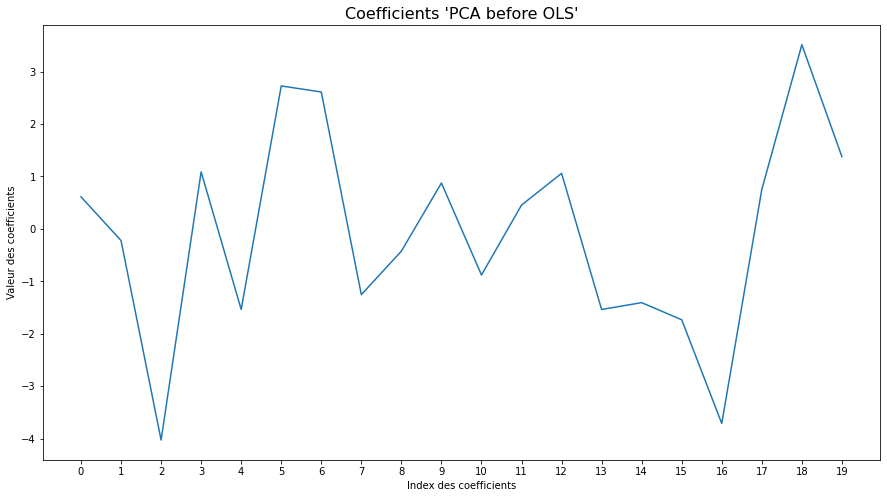

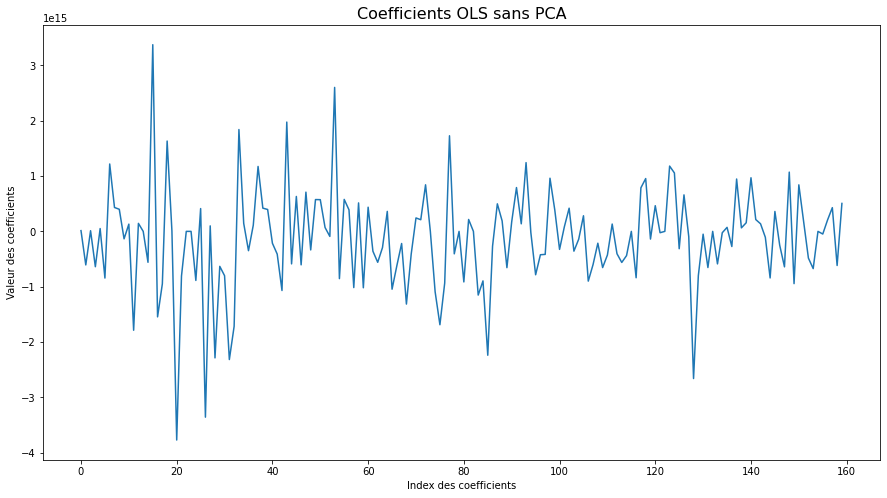

Notez le 10**15 au-dessus de l'axe des y sur le second plot : les coefficients explosent lorsque l'on n'applique pas la PCA.


In [6]:
#Question 5)
X_train_pca = X_train@eigvecs[:,:20] #eigvecs[:,:20] == les 20 premiers vecteurs propres
modelwpca = LinearRegression() #intercept=True par défaut dans sklearn
modelwpca.fit(X_train_pca, y_train)
plt.figure(figsize=(15,8))
plt.plot([str(x) for x in range(len(modelwpca.coef_.flatten()))], modelwpca.coef_.flatten())
plt.xlabel("Index des coefficients")
plt.ylabel("Valeur des coefficients")
plt.title("Coefficients 'PCA before OLS'", fontsize=16)
plt.show()
print()
print()
print()
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
plt.figure(figsize=(15,8))
plt.plot([x for x in range(len(model.coef_.flatten()))], model.coef_.flatten())
plt.xlabel("Index des coefficients")
plt.ylabel("Valeur des coefficients")
plt.title("Coefficients OLS sans PCA", fontsize=16)
plt.show()
print("Notez le 10**15 au-dessus de l'axe des y sur le second plot : les coefficients explosent lorsque l'on n'applique pas la PCA.")

# QUESTION 6

In [7]:
#Question 6)
print("Intercepts des deux modèles précédents :")
print()
print("Modèle 'PCA before OLS' :",modelwpca.intercept_)
print("Modèle OLS sans PCA :",model.intercept_)
print()
print("Moyenne de la variable y sur le train set :",np.mean(y_train.values))
print()
print("On remarque que l'intercept du modèle PCA before OLS est significativement plus proche de la moyenne de y_train que l'intercept du modèle sans PCA.")
print()
sc = StandardScaler()
X_train_pca_scaled = sc.fit_transform(X_train_pca)
model_scaled = LinearRegression()
model_scaled.fit(X_train_pca_scaled, y_train)
print("Intercept du modèle sur les données décomposées et normalisées :",model_scaled.intercept_)
print("L'intercept du modèle sur les données décomposées et normalisées est égal à la moyenne de y_train :",(model_scaled.intercept_ == np.mean(y_train.values))[0])

Intercepts des deux modèles précédents :

Modèle 'PCA before OLS' : [153.18395712]
Modèle OLS sans PCA : [151.98251039]

Moyenne de la variable y sur le train set : 153.09969788519638

On remarque que l'intercept du modèle PCA before OLS est significativement plus proche de la moyenne de y_train que l'intercept du modèle sans PCA.

Intercept du modèle sur les données décomposées et normalisées : [153.09969789]
L'intercept du modèle sur les données décomposées et normalisées est égal à la moyenne de y_train : True


# QUESTION 7

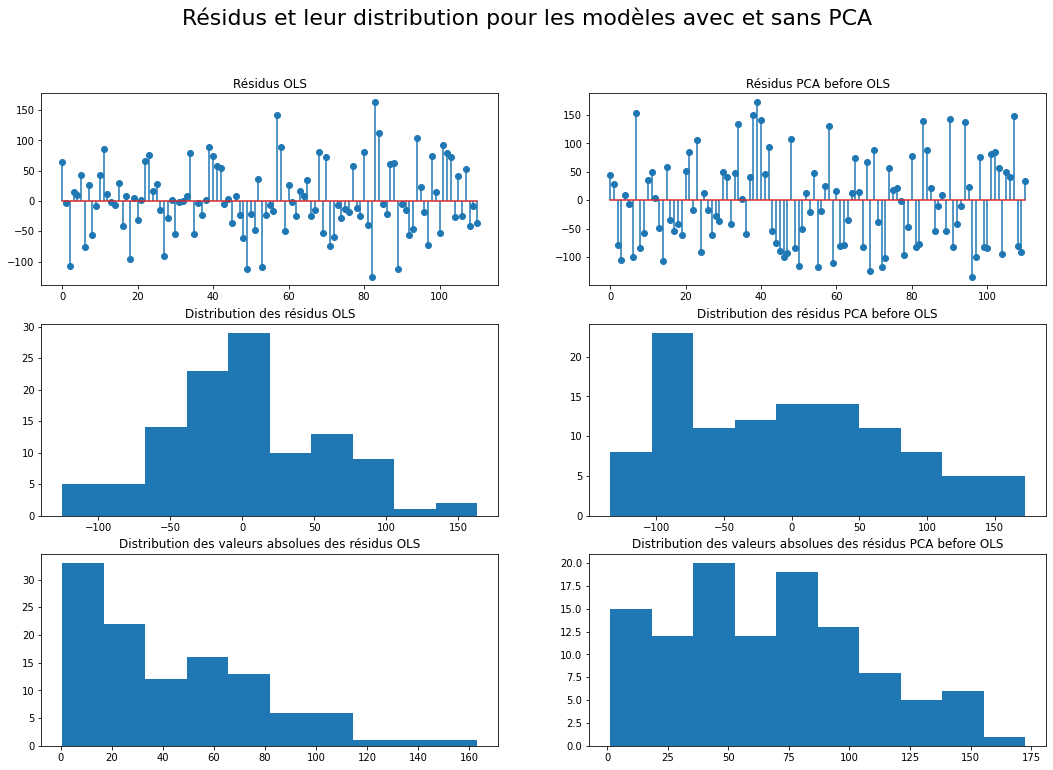


Coefficients de détermination :
Modèle sans PCA : 0.504410721934954
Modèle 'PCA before OLS' : 0.03656420270123373

Risques de prédiction :
Modèle sans PCA : 3112.295919918256
Modèle 'PCA before OLS' : 6050.367580072201


In [8]:
#Question 7)
pred = model.predict(X_test)
predwpca = modelwpca.predict(X_test@eigvecs[:,:20])
#Par définition des résidus :
residus = y_test-pred
residuswpca = y_test-predwpca
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(3,2,1)
ax.stem(residus)
ax.title.set_text("Résidus OLS")
ax = fig.add_subplot(3,2,2)
ax.stem(residuswpca)
ax.title.set_text("Résidus PCA before OLS")
ax = fig.add_subplot(3,2,3)
ax.hist(residus)
ax.title.set_text("Distribution des résidus OLS")
ax = fig.add_subplot(3,2,4)
ax.hist(residuswpca)
ax.title.set_text("Distribution des résidus PCA before OLS")
#Pour le plaisir
ax = fig.add_subplot(3,2,5)
ax.hist(np.abs(residus))
ax.title.set_text("Distribution des valeurs absolues des résidus OLS")
ax = fig.add_subplot(3,2,6)
ax.hist(np.abs(residuswpca))
ax.title.set_text("Distribution des valeurs absolues des résidus PCA before OLS")
fig.suptitle("Résidus et leur distribution pour les modèles avec et sans PCA",fontsize=22)
plt.show()
print()
print("Coefficients de détermination :")
print("Modèle sans PCA :",model.score(X_test,y_test))
print("Modèle 'PCA before OLS' :",modelwpca.score(X_test@eigvecs[:,:20],y_test))
print()
print("Risques de prédiction :")
print("Modèle sans PCA :",MSE(y_test,pred))
print("Modèle 'PCA before OLS' :",MSE(y_test,predwpca))

# QUESTION 8

RAPPELS :  
Pour l'implémentation en détail, voir les slides "intro_tests".
On a notre statistique de test :
$$
\widehat{T}_{k}=\left(\frac{n^{1 / 2}}{\sqrt{s_{k}^{2} \hat{\sigma}^{2}}}\right)\left|\widehat{\theta_{k}}\right|
$$
Avec :
$$
s^2_k = \hat{G}^{-1}_{kk}, \hat{G} = \frac{Z^TZ}{n}
$$
Et notre estimation de la variance des résidus :
$$
\hat{\sigma}^{2}=\sum_{i=1}^{n}\left(Y_{i}-z_{i}^{T} \widehat{\theta}_{n}\right)^{2} /(n-p-1)
$$

In [9]:
#Question 8)
#Initialisation
n = len(X_train)
selected = list()
r = y_train.values.copy()
#Boucle
while len(selected) < X_train.shape[1]:
    X_forward = X_train.drop(selected, axis = 1)
    rlist = list()
    t_hat = list()
    for i in range(X_forward.shape[1]):
        model_=LinearRegression()
        model_.fit(X_forward.iloc[:,i:i+1],r) #X_forward.iloc[:,i:i+1] renvoie un DataFrame qui ne contient que la colonne i
        y_hat = model_.predict(X_forward.iloc[:,i:i+1])
        s = ((X_forward.iloc[:,i:i+1].T@X_forward.iloc[:,i:i+1])/n)**-1 
        #==np.linalg.inv(Z.T@Z/n), ici Z est la colonne sur laquelle le modèle est entraîné
        rlist.append(r-y_hat)
        var_res = np.sum((r-y_hat)**2)/(n-2)
        t_hat.append((n**.5/(s*var_res)**.5)*np.abs(model_.coef_.flatten()[0]))
    selected.append(X_forward.columns.to_list()[np.argmax(t_hat)])
    r = rlist[np.argmax(t_hat)]
print("Variables dans l'ordre de sélection par Forward selection :")
print(selected)
print()
print("Dix premières variables sélectionnées par Forward selection :")
print(selected[:10])
print()
real_columns = [22,82,23,132,154,79,115,73,122,13]
print("Nombre de variables parmi les dix premières variables qui se trouvaient dans le jeu de données initial :")
print(len([x for x in real_columns if x in selected[:10]]))

Variables dans l'ordre de sélection par Forward selection :
[23, 122, 136, 132, 140, 154, 73, 82, 118, 85, 65, 115, 55, 156, 79, 17, 13, 75, 152, 94, 102, 142, 22, 108, 135, 56, 112, 130, 72, 48, 6, 141, 143, 46, 87, 93, 34, 66, 74, 16, 60, 127, 15, 36, 40, 41, 117, 126, 137, 25, 91, 63, 26, 96, 30, 64, 62, 38, 33, 103, 80, 2, 70, 84, 69, 105, 21, 153, 144, 20, 31, 123, 27, 116, 107, 44, 39, 53, 121, 113, 37, 4, 146, 106, 90, 61, 155, 42, 147, 11, 47, 131, 28, 128, 99, 133, 68, 111, 129, 81, 32, 45, 119, 58, 157, 101, 88, 120, 92, 86, 10, 57, 35, 134, 24, 5, 151, 100, 43, 124, 98, 0, 138, 52, 83, 1, 109, 7, 3, 9, 159, 78, 95, 18, 12, 14, 76, 97, 125, 67, 114, 145, 89, 149, 77, 104, 19, 51, 59, 8, 110, 158, 139, 71, 54, 150, 49, 29, 50, 148]

Dix premières variables sélectionnées par Forward selection :
[23, 122, 136, 132, 140, 154, 73, 82, 118, 85]

Nombre de variables parmi les dix premières variables qui se trouvaient dans le jeu de données initial :
6


# QUESTION 9

In [10]:
#Question 9)
X_train_fwd = X_train.iloc[:, selected[:10]]
X_test_fwd = X_test.iloc[:, selected[:10]]

model_fwd = LinearRegression()
model_fwd.fit(X_train_fwd,y_train)
print("Risque de prédiction du modèle entraîné sur les variables sélectionnées :", MSE(y_test, model_fwd.predict(X_test_fwd)))
print("Le risque est bien moindre après Forward selection.")
print("Pour rappel :")
print("Risques de prédiction :")
print("Modèle sans PCA :",MSE(y_test,pred))
print("Modèle 'PCA before OLS' :",MSE(y_test,predwpca))

Risque de prédiction du modèle entraîné sur les variables sélectionnées : 3174.9140674174455
Le risque est bien moindre après Forward selection.
Pour rappel :
Risques de prédiction :
Modèle sans PCA : 3112.295919918256
Modèle 'PCA before OLS' : 6050.367580072201


# QUESTION 10

In [11]:
#Question 10)
kf = KFold(5)
splits_X_train = list()
splits_y_train = list()
splits_X_test = list()
splits_y_test = list()
for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Fold {i} :")
    print("Train index :")
    print(train_index)
    print("Test index :")
    print(test_index)
    splits_X_train.append(X_train.iloc[train_index,:])
    splits_y_train.append(y_train.iloc[train_index,:])
    splits_X_test.append(X_train.iloc[test_index,:])
    splits_y_test.append(y_train.iloc[test_index,:])

Fold 0 :
Train index :
[ 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307

# QUESTION 11

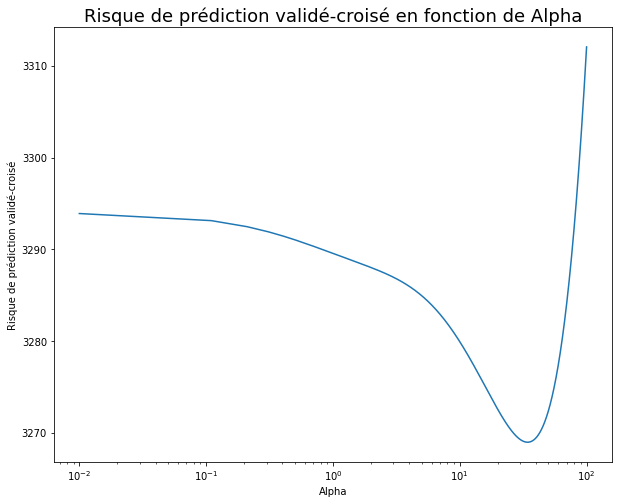


Paramètre de régularisation optimal : 34.24081081081081, valeur du risque sur le test pour cet alpha : 3268.965144312744


In [12]:
#Question 11)
dict_ = {}
for a in np.linspace(10**-2,10**2,1000):
    MSE_ = list()
    for i in range(5):
        Xtrainfold = splits_X_train[i]
        ytrainfold = splits_y_train[i]
        Xtestfold = splits_X_test[i]
        ytestfold = splits_y_test[i]
        model_ = Ridge(alpha = a)
        model_.fit(Xtrainfold, ytrainfold)
        MSE_.append(MSE(ytestfold, model_.predict(Xtestfold)))
    dict_[a] = np.mean(MSE_)

plt.figure(figsize=(10,8))
plt.plot(dict_.keys(), dict_.values())
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Risque de prédiction validé-croisé")
plt.title("Risque de prédiction validé-croisé en fonction de Alpha",fontsize=18)
plt.show()
print()
ideal_alpha = sorted(dict_.items(), key=lambda x: x[1])[0]
print(f"Paramètre de régularisation optimal : {ideal_alpha[0]}, valeur du risque sur le test pour cet alpha : {ideal_alpha[1]}")

# QUESTION 12

In [13]:
#Question 12)
lasso = LassoCV(random_state=10) #voir paramètres par défaut
lasso.fit(X_train, y_train.values.flatten())
print("LassoCV entraîné :")
print(f"Alpha choisi : {lasso.alpha_}")
print("Risque de prédiction associé à cet alpha :",MSE(y_test, lasso.predict(X_test)))

LassoCV entraîné :
Alpha choisi : 3.8531620139041807
Risque de prédiction associé à cet alpha : 3099.432863564932


# QUESTION 13

In [14]:
#Question 13)
print("Variables sélectionnées par le Lasso :")
print([i for i, c in enumerate(lasso.coef_) if c>0])
print("Nombre de variables sélectionnées par le Lasso :")
print(len([i for i, c in enumerate(lasso.coef_) if c>0]))
lslasso = LinearRegression()
lslasso.fit(X_train.iloc[:,[i for i, c in enumerate(lasso.coef_) if c>0]],y_train)
print("Risque de prédiction du LSLasso :",MSE(y_test, lslasso.predict(X_test.iloc[:,[i for i, c in enumerate(lasso.coef_) if c>0]])))

Variables sélectionnées par le Lasso :
[13, 23, 36, 85, 122, 124, 132, 142]
Nombre de variables sélectionnées par le Lasso :
8
Risque de prédiction du LSLasso : 3148.9174441419623


# QUESTION 14

In [15]:
#Question 14)
print("Variables retrouvées par le Lasso :")
print([i for i, c in enumerate(lasso.coef_) if c>0 and i in real_columns])
print("Nombre de variables retrouvées par le Lasso :")
print(len([i for i, c in enumerate(lasso.coef_) if c>0 and i in real_columns]))

Variables retrouvées par le Lasso :
[13, 23, 122, 132]
Nombre de variables retrouvées par le Lasso :
4
